## Big Mart Sales Prediction - Virtual Competition Analytics Vidhya

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the training dataset
train_df = pd.read_csv("train_v9rqX0R.csv")

In [3]:
# display the 1st 5 rows
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# display the columns
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train_df.shape

(8523, 12)

There are 8523 rows and 12 columns in the dataset.

In [6]:
# get info on the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item weight and outlet size have missing values. Item_Identifier,Item_Fat_Content,Item_Type, Outlet_Identifier, Outlet_Size,Outlet_Location_Type and Outlet_Type are all columns with object datatypes.

In [7]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
# check the summary statistics
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### EDA and Handling missing values

In [9]:
# check the unique values in each column
train_df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
train_df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [11]:
train_df['Item_Weight'].isna().sum()

1463

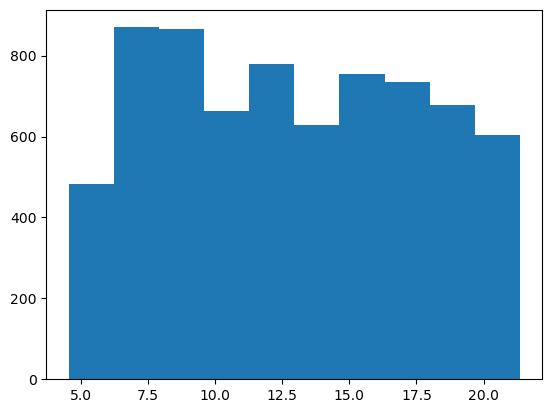

In [12]:
#distribution of item weight
plt.hist(train_df['Item_Weight'])
plt.show()

In Item_Weight column, mean>median,distribution is skewed to the right. 

In [13]:
train_df[train_df['Item_Weight'].isna()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Item weight is missing for outlets established in year 1985.

In [14]:
train_df[train_df['Outlet_Establishment_Year']==1985]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [15]:
# check for any relationship between item identifier and item weight
train_df[['Item_Identifier',"Item_Weight"]]

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [16]:
train_df[train_df['Item_Identifier']=="FDA15"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [17]:
# sort the values by item_identifier
train_df1= train_df.sort_values(['Item_Identifier'])

In [18]:
train_df1['Item_Weight'].head(15)

8043    11.60
118     11.60
1693    11.60
1197    11.60
1245    11.60
7467    11.60
8195    19.35
6863    19.35
2879      NaN
4416      NaN
4900    19.35
4130    19.35
1148    19.35
3927     8.27
1876     8.27
Name: Item_Weight, dtype: float64

The missing item weights can hence be filled using forward fill method.

In [19]:
train_df1['Item_Weight']= train_df1['Item_Weight'].fillna(method="ffill")

In [20]:
train_df1['Item_Weight'].isna().sum()

0

In [21]:
train_df1['Item_Fat_Content'].unique()

array(['Low Fat', 'LF', 'Regular', 'reg', 'low fat'], dtype=object)

Item Fat content column has only 2 unique values actually, rest three are repetitions and needs to mapped. 

In [22]:
train_df1['Item_Fat_Content']=train_df1['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                   "LF":"Low Fat",
                                   'Regular':'Regular',
                                   "reg":"Regular",
                                   "low fat":"Low Fat"})

In [23]:
train_df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [24]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [25]:
train_df1[train_df1['Item_Visibility']==0.000000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1693,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.600,Low Fat,0.0,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
5609,DRA59,8.270,Regular,0.0,Soft Drinks,183.2924,OUT017,2007,NaN,Tier 2,Supermarket Type1,2406.2012
576,DRB48,16.750,Regular,0.0,Soft Drinks,39.3822,OUT046,1997,Small,Tier 1,Supermarket Type1,353.5398
2545,DRC13,8.260,Regular,0.0,Soft Drinks,122.5730,OUT045,2002,NaN,Tier 2,Supermarket Type1,739.0380
...,...,...,...,...,...,...,...,...,...,...,...,...
3863,NCZ18,7.825,Low Fat,0.0,Household,253.4698,OUT017,2007,NaN,Tier 2,Supermarket Type1,6849.0846
3739,NCZ30,6.590,Low Fat,0.0,Household,119.1098,OUT017,2007,NaN,Tier 2,Supermarket Type1,964.0784
6965,NCZ41,19.850,Low Fat,0.0,Health and Hygiene,126.1704,OUT018,2009,Medium,Tier 3,Supermarket Type2,1877.5560
411,NCZ42,10.500,Low Fat,0.0,Household,238.3248,OUT010,1998,NaN,Tier 3,Grocery Store,711.0744


In [26]:
train_df1['Item_Visibility'].nunique()

7880

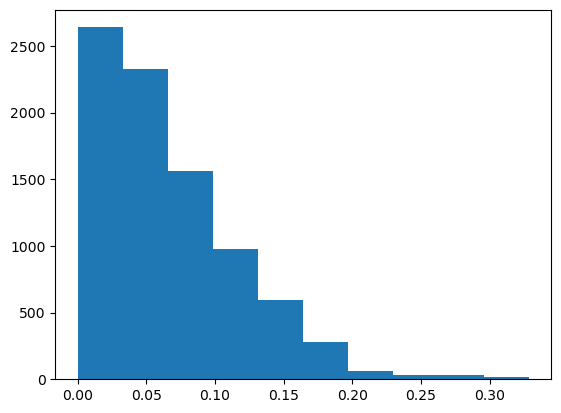

In [27]:
# distribution of item visibility
plt.hist(train_df1['Item_Visibility'])
plt.show()

In [28]:
train_df1['Item_Type'].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned', 'Frozen Foods',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Starchy Foods', 'Meat', 'Seafood', 'Breakfast', 'Breads',
       'Health and Hygiene', 'Household', 'Others'], dtype=object)

In [29]:
train_df1['Item_Type'].isna().sum()

0

In [30]:
train_df1['Item_MRP'].unique()

array([143.0154, 140.3154, 141.9154, ..., 161.3552, 164.0552, 160.9552])

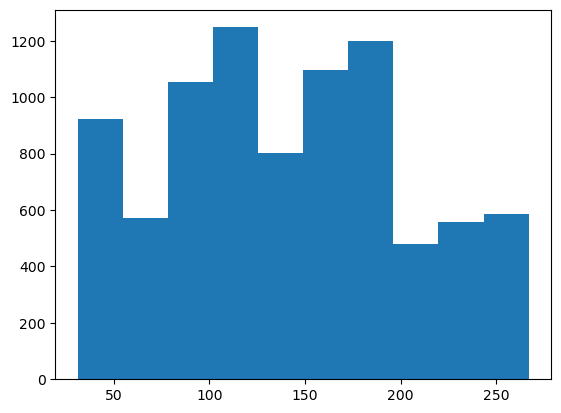

In [31]:
plt.hist(train_df1['Item_MRP'])
plt.show()

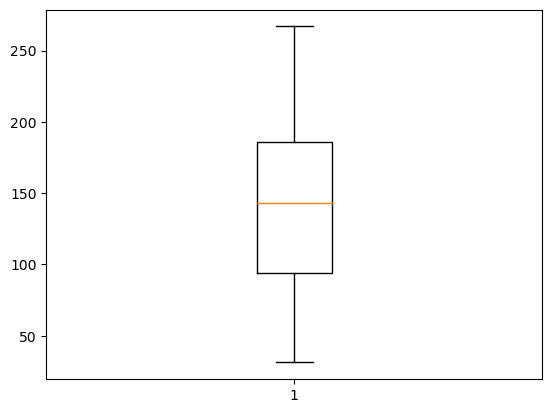

In [32]:
plt.boxplot(train_df1['Item_MRP'])
plt.show()

In [33]:
train_df1['Outlet_Identifier'].isna().sum()

0

In [34]:
train_df1['Outlet_Identifier'].unique()

array(['OUT010', 'OUT017', 'OUT035', 'OUT045', 'OUT013', 'OUT018',
       'OUT049', 'OUT019', 'OUT027', 'OUT046'], dtype=object)

In [35]:
train_df1['Outlet_Establishment_Year'].isna().sum()

0

In [36]:
train_df1['Outlet_Establishment_Year'].unique()

array([1998, 2007, 2004, 2002, 1987, 2009, 1999, 1985, 1997], dtype=int64)

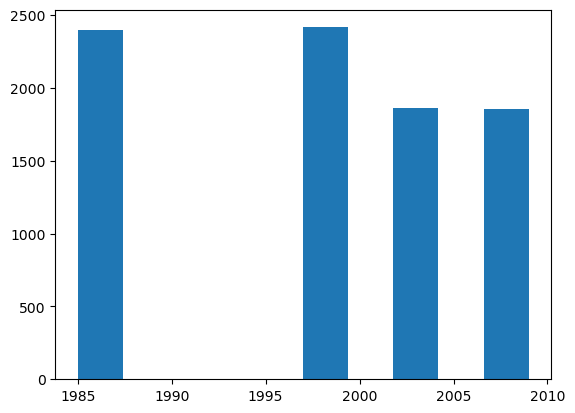

In [37]:
plt.hist(train_df1['Outlet_Establishment_Year'])
plt.show()

After 1987, 1997 year values are present.10 year gap in between.

In [38]:
train_df1['Outlet_Size'].unique()

array([nan, 'Small', 'High', 'Medium'], dtype=object)

In [39]:
train_df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
train_df1['Outlet_Size'].isna().sum()

2410

2410 outlet size values are missing.

In [41]:
train_df1[train_df1['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
...,...,...,...,...,...,...,...,...,...,...,...,...
411,NCZ42,10.50,Low Fat,0.000000,Household,238.3248,OUT010,1998,NaN,Tier 3,Grocery Store,711.0744
1115,NCZ42,10.50,Low Fat,0.011352,Household,236.5248,OUT017,2007,NaN,Tier 2,Supermarket Type1,4029.4216
4924,NCZ53,9.60,Low Fat,0.040970,Health and Hygiene,188.7214,OUT010,1998,NaN,Tier 3,Grocery Store,376.8428
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728


In [42]:
null_size = train_df1[train_df1['Outlet_Size'].isna()]

In [43]:
null_size['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [44]:
train_df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_size is null for the outlets OUT045,OUT017,OUT010

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

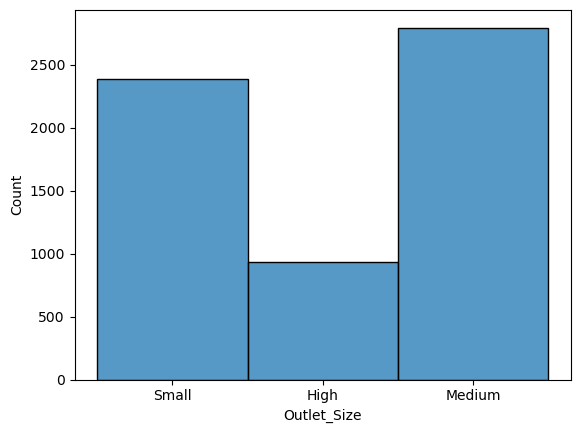

In [45]:
sns.histplot(train_df1['Outlet_Size'])

In [46]:
train_df1['Outlet_Size']

8043       NaN
118        NaN
1693     Small
1197       NaN
1245      High
         ...  
7926    Medium
214        NaN
1896    Medium
7166     Small
7738    Medium
Name: Outlet_Size, Length: 8523, dtype: object

In [47]:
# sort by outlet type and then forward fill the outlet size
train_df1['Outlet_Size'] = train_df1.sort_values(['Outlet_Type'])['Outlet_Size'].fillna(method="ffill")

In [48]:
train_df1['Outlet_Size'].isna().sum()

3

In [49]:
#backward fill the rest 3 missing values
train_df1['Outlet_Size'] = train_df1.sort_values(['Outlet_Type'])['Outlet_Size'].fillna(method="bfill")

In [50]:
train_df1['Outlet_Size'].isna().sum()

0

In [51]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [52]:
train_df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [53]:
train_df1['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2', 'Tier 1'], dtype=object)

In [54]:
train_df1['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [55]:
train_df1['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [56]:
train_df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Encoding and Scaling

In [57]:

train_df1['Item_Identifier'].nunique()

1559

In [58]:
# drop the item_identifier column
train_df2 = train_df1.drop(['Item_Identifier'], axis=1)

In [59]:
train_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Small,Tier 3,Grocery Store,283.6308
118,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Small,Tier 2,Supermarket Type1,2552.6772
1693,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,High,Tier 2,Supermarket Type1,3829.0158
1245,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...
7926,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,Small,Tier 3,Grocery Store,324.9104
1896,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [60]:
# label encode fat content
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()
train_df2['Item_Fat_Content'] = le.fit_transform(train_df2['Item_Fat_Content'])

In [62]:
# label encode outlet establishment year 
train_df2['Outlet_Establishment_Year']=le.fit_transform(train_df2['Outlet_Establishment_Year'])

In [63]:
train_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,11.60,0,0.068535,Soft Drinks,143.0154,OUT010,3,Small,Tier 3,Grocery Store,283.6308
118,11.60,0,0.041178,Soft Drinks,140.3154,OUT017,7,Small,Tier 2,Supermarket Type1,2552.6772
1693,11.60,0,0.000000,Soft Drinks,141.9154,OUT035,6,Small,Tier 2,Supermarket Type1,992.7078
1197,11.60,0,0.000000,Soft Drinks,141.6154,OUT045,5,High,Tier 2,Supermarket Type1,3829.0158
1245,11.60,0,0.040912,Soft Drinks,142.3154,OUT013,1,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...
7926,14.65,0,0.083489,Household,161.3552,OUT049,4,Medium,Tier 1,Supermarket Type1,7148.0288
214,14.65,0,0.000000,Household,161.5552,OUT010,3,Small,Tier 3,Grocery Store,324.9104
1896,14.65,0,0.082956,Household,164.0552,OUT027,0,Medium,Tier 3,Supermarket Type3,5523.4768
7166,14.65,0,0.145952,Household,160.9552,OUT019,0,Small,Tier 1,Grocery Store,162.4552


In [64]:
# one hot encode outlet identifier
train_df2 = pd.get_dummies(train_df2, columns=['Outlet_Identifier'])

In [65]:
# one hot encode item_type
from sklearn.preprocessing import OneHotEncoder

In [66]:

train_df2 = pd.get_dummies(train_df2, columns=['Item_Type'])


In [67]:
# label encode outlet size
train_df2['Outlet_Size'] = le.fit_transform(train_df2['Outlet_Size'])

In [68]:
train_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
8043,11.60,0,0.068535,143.0154,3,2,Tier 3,Grocery Store,283.6308,1,...,0,0,0,0,0,0,0,0,1,0
118,11.60,0,0.041178,140.3154,7,2,Tier 2,Supermarket Type1,2552.6772,0,...,0,0,0,0,0,0,0,0,1,0
1693,11.60,0,0.000000,141.9154,6,2,Tier 2,Supermarket Type1,992.7078,0,...,0,0,0,0,0,0,0,0,1,0
1197,11.60,0,0.000000,141.6154,5,0,Tier 2,Supermarket Type1,3829.0158,0,...,0,0,0,0,0,0,0,0,1,0
1245,11.60,0,0.040912,142.3154,1,0,Tier 3,Supermarket Type1,2552.6772,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,14.65,0,0.083489,161.3552,4,1,Tier 1,Supermarket Type1,7148.0288,0,...,0,0,0,1,0,0,0,0,0,0
214,14.65,0,0.000000,161.5552,3,2,Tier 3,Grocery Store,324.9104,1,...,0,0,0,1,0,0,0,0,0,0
1896,14.65,0,0.082956,164.0552,0,1,Tier 3,Supermarket Type3,5523.4768,0,...,0,0,0,1,0,0,0,0,0,0
7166,14.65,0,0.145952,160.9552,0,2,Tier 1,Grocery Store,162.4552,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
#label encode location type
train_df2['Outlet_Location_Type'] = le.fit_transform(train_df2['Outlet_Location_Type'])

In [70]:
# one hot encode outlet type

train_df2 = pd.get_dummies(train_df2, columns=['Outlet_Type'])

In [71]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int32  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   int32  
 6   Outlet_Location_Type             8523 non-null   int32  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Outlet_Identifier_OUT010         8523 non-null   uint8  
 9   Outlet_Identifier_OUT013         8523 non-null   uint8  
 10  Outlet_Identifier_OUT017         8523 non-null   uint8  
 11  Outlet_Identifier_OUT018         8523 non-null   uint8  
 12  Outlet_Identifier

In [72]:
train_df2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.871711,0.352693,0.066132,140.992782,3.790684,1.291564,1.112871,2181.288914,0.065118,0.109351,...,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.127068,0.654347,0.108882,0.109703
std,4.651306,0.477836,0.051598,62.275067,2.730322,0.729123,0.812757,1706.499616,0.246748,0.312098,...,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.333069,0.475609,0.311509,0.312538
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.775000,0.000000,0.026989,93.826500,1.000000,1.000000,0.000000,834.247400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.600000,0.000000,0.053931,143.012800,4.000000,1.000000,1.000000,1794.331000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.850000,1.000000,0.094585,185.643700,6.000000,2.000000,2.000000,3101.296400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,8.000000,2.000000,2.000000,13086.964800,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
train_df2.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outle

In [74]:
# list of columns to be scaled
scale_cols = ['Item_Weight','Item_Visibility', 'Item_MRP']

### Scaling

In [75]:
#  from sklearn.preprocessing import MinMaxScaler

In [76]:
#  # scale the features between range 0-1
# minmax = MinMaxScaler(feature_range=(1,10))
# train_df2[scale_cols] = minmax.fit_transform(train_df2[scale_cols])

In [77]:
train_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8043,11.60,0,0.068535,143.0154,3,2,2,283.6308,1,0,...,0,0,0,0,1,0,1,0,0,0
118,11.60,0,0.041178,140.3154,7,2,1,2552.6772,0,0,...,0,0,0,0,1,0,0,1,0,0
1693,11.60,0,0.000000,141.9154,6,2,1,992.7078,0,0,...,0,0,0,0,1,0,0,1,0,0
1197,11.60,0,0.000000,141.6154,5,0,1,3829.0158,0,0,...,0,0,0,0,1,0,0,1,0,0
1245,11.60,0,0.040912,142.3154,1,0,2,2552.6772,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,14.65,0,0.083489,161.3552,4,1,0,7148.0288,0,0,...,0,0,0,0,0,0,0,1,0,0
214,14.65,0,0.000000,161.5552,3,2,2,324.9104,1,0,...,0,0,0,0,0,0,1,0,0,0
1896,14.65,0,0.082956,164.0552,0,1,2,5523.4768,0,0,...,0,0,0,0,0,0,0,0,0,1
7166,14.65,0,0.145952,160.9552,0,2,0,162.4552,0,0,...,0,0,0,0,0,0,1,0,0,0


### Pre-process test data

In [78]:
# read test data into jupyter
test_df = pd.read_csv("test_AbJTz2l.csv")

In [79]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [81]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [82]:
# sort values by item identifier
test_df1= test_df.sort_values(['Item_Identifier'])

In [83]:
test_df1['Item_Weight'].head(15)

5081    11.600
500     11.600
3912       NaN
2847    19.350
4538    19.350
1211    19.350
3666     8.270
4334     8.270
104        NaN
5063     7.390
3573     7.390
4485     7.390
1243     7.390
3503     6.115
2495     6.115
Name: Item_Weight, dtype: float64

In [84]:
# fill the null weights using forward fill
test_df1['Item_Weight']= test_df1['Item_Weight'].fillna(method="ffill")

In [85]:
test_df1['Item_Weight'].isna().sum()

0

In [86]:
test_df1['Item_Fat_Content'].unique()

array(['LF', 'Low Fat', 'Regular', 'reg', 'low fat'], dtype=object)

Item Fat content column has only 2 unique values actually, rest three are repetitions and needs to mapped. 

In [87]:

test_df1['Item_Fat_Content']=test_df1['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                   "LF":"Low Fat",
                                   'Regular':'Regular',
                                   "reg":"Regular",
                                   "low fat":"Low Fat"})

In [88]:
test_df1['Item_Fat_Content'].unique()



array(['Low Fat', 'Regular'], dtype=object)

In [89]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 5081 to 4700
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 532.6+ KB


In [90]:
test_df1[test_df1['Item_Visibility']==0.000000]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5063,DRB01,7.390,Low Fat,0.0,Soft Drinks,191.7530,OUT035,2004,Small,Tier 2,Supermarket Type1
3582,DRB13,6.115,Regular,0.0,Soft Drinks,190.2530,OUT027,1985,Medium,Tier 3,Supermarket Type3
1893,DRD27,18.750,Low Fat,0.0,Dairy,99.3042,OUT046,1997,Small,Tier 1,Supermarket Type1
5226,DRD37,9.800,Low Fat,0.0,Soft Drinks,48.0060,OUT035,2004,Small,Tier 2,Supermarket Type1
140,DRF48,5.730,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,NaN,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
2772,NCW18,15.100,Low Fat,0.0,Household,235.5248,OUT045,2002,NaN,Tier 2,Supermarket Type1
2551,NCW42,18.200,Low Fat,0.0,Household,222.0456,OUT046,1997,Small,Tier 1,Supermarket Type1
3149,NCX30,16.700,Low Fat,0.0,Household,247.5776,OUT010,1998,NaN,Tier 3,Grocery Store
3647,NCX53,20.100,Low Fat,0.0,Health and Hygiene,142.3154,OUT035,2004,Small,Tier 2,Supermarket Type1


In [91]:
test_df1['Item_Visibility'].nunique()



5277

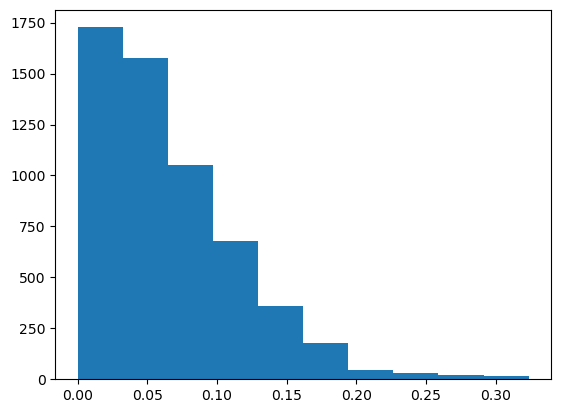

In [92]:
plt.hist(test_df1['Item_Visibility'])
plt.show()


In [93]:

test_df1['Item_Type'].unique()

array(['Soft Drinks', 'Dairy', 'Hard Drinks', 'Canned',
       'Fruits and Vegetables', 'Snack Foods', 'Baking Goods',
       'Frozen Foods', 'Starchy Foods', 'Meat', 'Seafood', 'Breakfast',
       'Breads', 'Health and Hygiene', 'Household', 'Others'],
      dtype=object)

In [94]:
test_df1['Item_Type'].isna().sum()

0

In [95]:
test_df1['Item_MRP'].unique()

array([141.0154, 142.9154, 140.0154, ..., 163.6552, 160.4552, 161.4552])

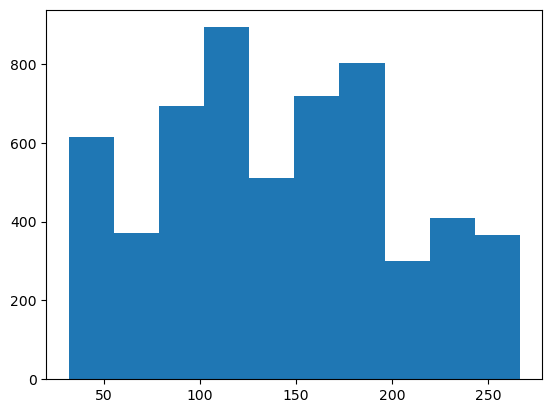

In [96]:
plt.hist(test_df1['Item_MRP'])
plt.show()

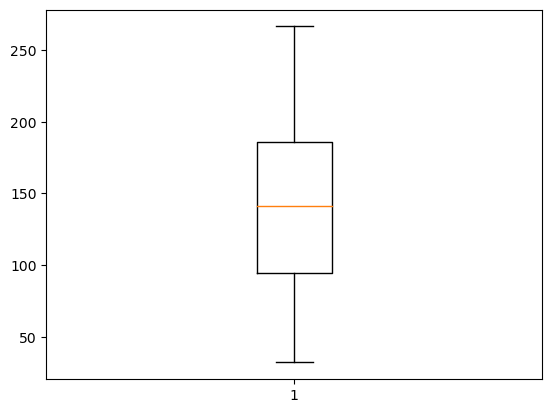

In [97]:
plt.boxplot(test_df1['Item_MRP'])
plt.show()

In [98]:
test_df1['Outlet_Identifier'].isna().sum()

0

In [99]:
test_df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT046', 'OUT027', 'OUT018', 'OUT045', 'OUT035',
       'OUT019', 'OUT017', 'OUT013', 'OUT010'], dtype=object)

In [100]:
test_df1['Outlet_Establishment_Year'].isna().sum()

0

In [101]:
test_df1['Outlet_Establishment_Year'].unique()

array([1999, 1997, 1985, 2009, 2002, 2004, 2007, 1987, 1998], dtype=int64)

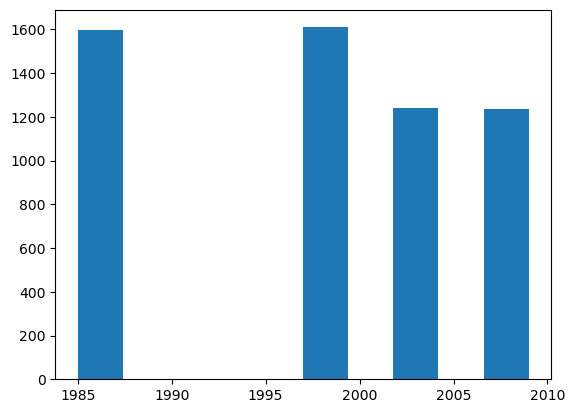

In [102]:
plt.hist(test_df1['Outlet_Establishment_Year'])
plt.show()

After 1987, 1997 year values are present.10 year gap in between.

In [103]:
test_df1['Outlet_Size'].unique()

array(['Medium', 'Small', nan, 'High'], dtype=object)

In [104]:
test_df1['Outlet_Size'].isna().sum()

1606

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

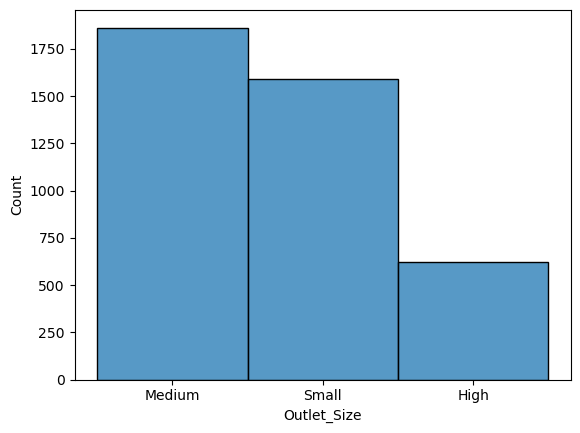

In [105]:
sns.histplot(test_df1['Outlet_Size'])

In [106]:
test_df1['Outlet_Size']

5081    Medium
500      Small
3912    Medium
2847    Medium
4538     Small
         ...  
2318       NaN
1730     Small
2907     Small
4307      High
4700       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [107]:
# sort by outlet type and then forward fill the outlet size
test_df1['Outlet_Size'] = test_df1.sort_values(['Outlet_Type'])['Outlet_Size'].fillna(method="ffill")

In [108]:
test_df1['Outlet_Size'].isna().sum()

0

In [109]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 5081 to 4700
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 532.6+ KB


In [110]:
test_df1['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [111]:
test_df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [112]:
test_df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type3', 'Supermarket Type2',
       'Grocery Store'], dtype=object)

### Encoding and Scaling

In [113]:

test_df1['Item_Identifier'].nunique()

1543

In [114]:
# drop the item_identifier and outlet identifier column
test_df2 = test_df1.drop(['Item_Identifier'], axis=1)

In [115]:
test_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5081,11.60,Low Fat,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,11.60,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
2318,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2007,Small,Tier 2,Supermarket Type1
1730,9.60,Low Fat,0.024477,Health and Hygiene,189.6214,OUT046,1997,Small,Tier 1,Supermarket Type1
2907,14.65,Low Fat,0.083344,Household,163.6552,OUT035,2004,Small,Tier 2,Supermarket Type1
4307,14.65,Low Fat,0.083290,Household,160.4552,OUT013,1987,High,Tier 3,Supermarket Type1


In [116]:
# label encode fat content
le = LabelEncoder()
test_df2['Item_Fat_Content'] = le.fit_transform(test_df2['Item_Fat_Content'])

In [117]:
# one hot encode outlet identifier
test_df2 = pd.get_dummies(test_df2, columns=['Outlet_Identifier'])

In [118]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 5081 to 4700
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int32  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
 9   Outlet_Identifier_OUT010   5681 non-null   uint8  
 10  Outlet_Identifier_OUT013   5681 non-null   uint8  
 11  Outlet_Identifier_OUT017   5681 non-null   uint8  
 12  Outlet_Identifier_OUT018   5681 non-null   uint8  
 13  Outlet_Identifier_OUT019   5681 non-null   ui

In [119]:
# label encode outlet establishment year
test_df2['Outlet_Establishment_Year']=le.fit_transform(test_df2['Outlet_Establishment_Year'])

In [120]:
# one hot encode item_type
test_df2 = pd.get_dummies(test_df2, columns=['Item_Type'])


In [121]:
# label encode outlet size
test_df2['Outlet_Size'] = le.fit_transform(test_df2['Outlet_Size'])

In [122]:
test_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5081,11.60,0,0.041010,141.0154,4,1,Tier 1,Supermarket Type1,0,0,...,0,0,0,0,0,0,0,0,1,0
500,11.60,0,0.040946,142.9154,2,2,Tier 1,Supermarket Type1,0,0,...,0,0,0,0,0,0,0,0,1,0
3912,11.60,0,0.040748,140.0154,0,1,Tier 3,Supermarket Type3,0,0,...,0,0,0,0,0,0,0,0,1,0
2847,19.35,1,0.040091,163.6868,8,1,Tier 3,Supermarket Type2,0,0,...,0,0,0,0,0,0,0,0,1,0
4538,19.35,1,0.039928,164.5868,2,2,Tier 1,Supermarket Type1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,9.60,0,0.024616,190.0214,7,2,Tier 2,Supermarket Type1,0,0,...,0,0,1,0,0,0,0,0,0,0
1730,9.60,0,0.024477,189.6214,2,2,Tier 1,Supermarket Type1,0,0,...,0,0,1,0,0,0,0,0,0,0
2907,14.65,0,0.083344,163.6552,6,2,Tier 2,Supermarket Type1,0,0,...,0,0,0,1,0,0,0,0,0,0
4307,14.65,0,0.083290,160.4552,1,0,Tier 3,Supermarket Type1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [123]:
#label encode location type
test_df2['Outlet_Location_Type'] = le.fit_transform(test_df2['Outlet_Location_Type'])

In [124]:
# one hot encode outlet type

test_df2 = pd.get_dummies(test_df2, columns=['Outlet_Type'])

In [125]:
test_df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
5081,11.60,0,0.041010,141.0154,4,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
500,11.60,0,0.040946,142.9154,2,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3912,11.60,0,0.040748,140.0154,0,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2847,19.35,1,0.040091,163.6868,8,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4538,19.35,1,0.039928,164.5868,2,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,9.60,0,0.024616,190.0214,7,2,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1730,9.60,0,0.024477,189.6214,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2907,14.65,0,0.083344,163.6552,6,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4307,14.65,0,0.083290,160.4552,1,0,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
 # scale the test data
# minmax = MinMaxScaler(feature_range=(1,10))
# test_df2[scale_cols] = minmax.fit_transform(test_df2[scale_cols])

### Modelling and evaluation

In [127]:
#Linear Regression model

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x = train_df2.drop(['Item_Outlet_Sales'], axis=1)
y = train_df2['Item_Outlet_Sales']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [133]:
lr_pred = lr.predict(x_test)

In [134]:
# evaluate the model

In [135]:
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
print(mean_squared_error(y_test, lr_pred))
print(r2_score(y_test, lr_pred))

1235268.4739653026
0.5626755862327322


In [137]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [138]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [139]:
dtr_pred = dtr.predict(x_test)

In [140]:
print(mean_squared_error(y_test, dtr_pred))
print(r2_score(y_test, dtr_pred))

2250960.9561318886
0.20308807251156524


In [141]:
# Support Vector Regression
from sklearn.svm import SVR

In [142]:
svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [143]:
print(mean_squared_error(y_test, svr_pred))
print(r2_score(y_test, svr_pred))

2323237.033643616
0.17750003728409003


In [144]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [145]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

In [146]:
print(mean_squared_error(y_test, lasso_pred))
print(r2_score(y_test, lasso_pred))

1244456.6614339624
0.5594226749968317


In [147]:
# Ridge regression
from sklearn.linear_model import Ridge

In [148]:
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

In [149]:
print(mean_squared_error(y_test, ridge_pred))
print(r2_score(y_test, ridge_pred))

1235277.7620954798
0.5626722979385919


In [150]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [151]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

In [152]:
print(mean_squared_error(y_test, rfr_pred))
print(r2_score(y_test, rfr_pred))

1229929.680565352
0.564565689269494


### Final model

In [153]:
# split the features and target
X_train = train_df2.drop(['Item_Outlet_Sales'], axis=1)
y_train = train_df2['Item_Outlet_Sales']
X_test = test_df2
 

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [156]:
rfr_pred

array([2262.002236, 2108.768366, 3318.786628, ..., 3240.388678,
       2900.930548, 3338.773944])

In [157]:
# upload sample submission file

In [158]:
sample_df = pd.read_csv("sample_submission_8RXa3c6.csv")

In [159]:
sample_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [160]:
# replace item sales with prediction
sample_df['Item_Outlet_Sales'] = rfr_pred

In [161]:
sample_df.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2194.562197
std,1383.470240
min,48.510188
25%,1069.401302
50%,2095.126124
75%,3082.813792
max,9336.400214


In [162]:
# save the dataframe as csv
sample_df.to_csv("rfrmodel.csv", index=False)

In [163]:
pd.read_csv("rfrmodel.csv")

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2262.002236
1,FDW14,OUT017,2108.768366
2,NCN55,OUT010,3318.786628
3,FDQ58,OUT017,2592.645174
4,FDY38,OUT027,1998.545176
...,...,...,...
5676,FDB58,OUT046,3328.553914
5677,FDD47,OUT018,3691.095330
5678,NCO17,OUT045,3240.388678
5679,FDJ26,OUT017,2900.930548
